In [1]:
import json
import pandas as pd

# 读取JSON文件
def read_json_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data

# 提取所需字段并转换为DataFrame
def extract_relevant_data(json_data):
    data = []
    for item in json_data:
        name = item['name']
        province = item['province']
        lat = item['location']['lat']
        lng = item['location']['lng']
        data.append({
            'name': name,
            'province': province,
            'lat': lat,
            'lng': lng
        })
    df = pd.DataFrame(data)
    return df

# 保存DataFrame为CSV文件
def save_to_csv(df, file_path):
    df.to_csv(file_path, index=False, encoding='utf-8-sig')

# 主程序
if __name__ == "__main__":
    json_file_path = '学校-28610.json'
    csv_file_path = 'universities.csv'
    
    json_data = read_json_file(json_file_path)
    df = extract_relevant_data(json_data)
    save_to_csv(df, csv_file_path)
    print(f"数据已保存到 {csv_file_path}")



数据已保存到 universities.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 示例使用
file_path = 'universities.csv'
subset_size = None  # 例如，只使用前100个样本进行训练和测试

# 读取CSV文件
chinese_places_df = pd.read_csv(file_path)

# 显示数据集的前几行以了解其结构
print("Data preview:")
print(chinese_places_df.head())

# 提取地点名称和对应的地理坐标
places = chinese_places_df['name'].tolist()
coordinates = chinese_places_df[['lat', 'lng']].values

# 划分训练集和测试集
places_train, places_test, coords_train, coords_test = train_test_split(
        places, coordinates, test_size=0.2, random_state=42
    )

# 截取数据集的一部分
if subset_size is not None:
    places_train = places_train[:subset_size]
    coords_train = coords_train[:subset_size]
    places_test = places_test[:subset_size]
    coords_test = coords_test[:subset_size]

# 生成输入格式
def format_input_for_llama(place_name):
    prompt = f"{place_name}的经纬度坐标是"
    return prompt

# 生成训练和测试集的输入
inputs_train = [format_input_for_llama(place) for place in places_train]
inputs_test = [format_input_for_llama(place) for place in places_test]

# 查看生成的部分输入和对应坐标
print("Sample formatted inputs for training:")
for i in range(min(5, len(inputs_train))):
    print(f"Input: {inputs_train[i]}, Coordinates: {coords_train[i]}")

print("Number of training samples:", len(inputs_train))
print("Number of testing samples:", len(inputs_test))

Data preview:
       name province        lat         lng
0    中央戏剧学院      北京市  39.942333  116.411033
1   北京协和医学院      北京市  39.917338  116.421237
2  北京市一七一中学      北京市  39.964904  116.435063
3   北京市第二中学      北京市  39.925830  116.430085
4  北京市广渠门中学      北京市  39.901966  116.444750
Sample formatted inputs for training:
Input: 鹤壁高中(淮河路)的经纬度坐标是, Coordinates: [ 35.743711 114.312075]
Input: 江苏旅游职业学院(新校区)的经纬度坐标是, Coordinates: [ 32.307153 119.417472]
Input: 北京中医药大学(良乡校区)的经纬度坐标是, Coordinates: [ 39.718568 116.17721 ]
Input: 蒋坊中学的经纬度坐标是, Coordinates: [ 26.503206 110.358327]
Input: 盐山县第三中学的经纬度坐标是, Coordinates: [ 38.037131 117.237131]
Number of training samples: 22888
Number of testing samples: 5722


In [3]:
!pip install geopandas

Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 7.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 80.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 112.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 118.2 MB/s eta 0:00:00
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.4
    Uninstalling Shapely-1.8.4:
      Successfully uninstalled Shapely-1.8.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pai-easycv 0.11.6 requires shapely==1.8.4, but you have shapely 2.0.5 which is incompatible.
pai-easycv 0.11.6 requires timm==0.5.4, but you have timm 1.0.8 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To

Skipping field center: unsupported OGR type: 3
Skipping field centroid: unsupported OGR type: 3
Skipping field acroutes: unsupported OGR type: 1
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfon

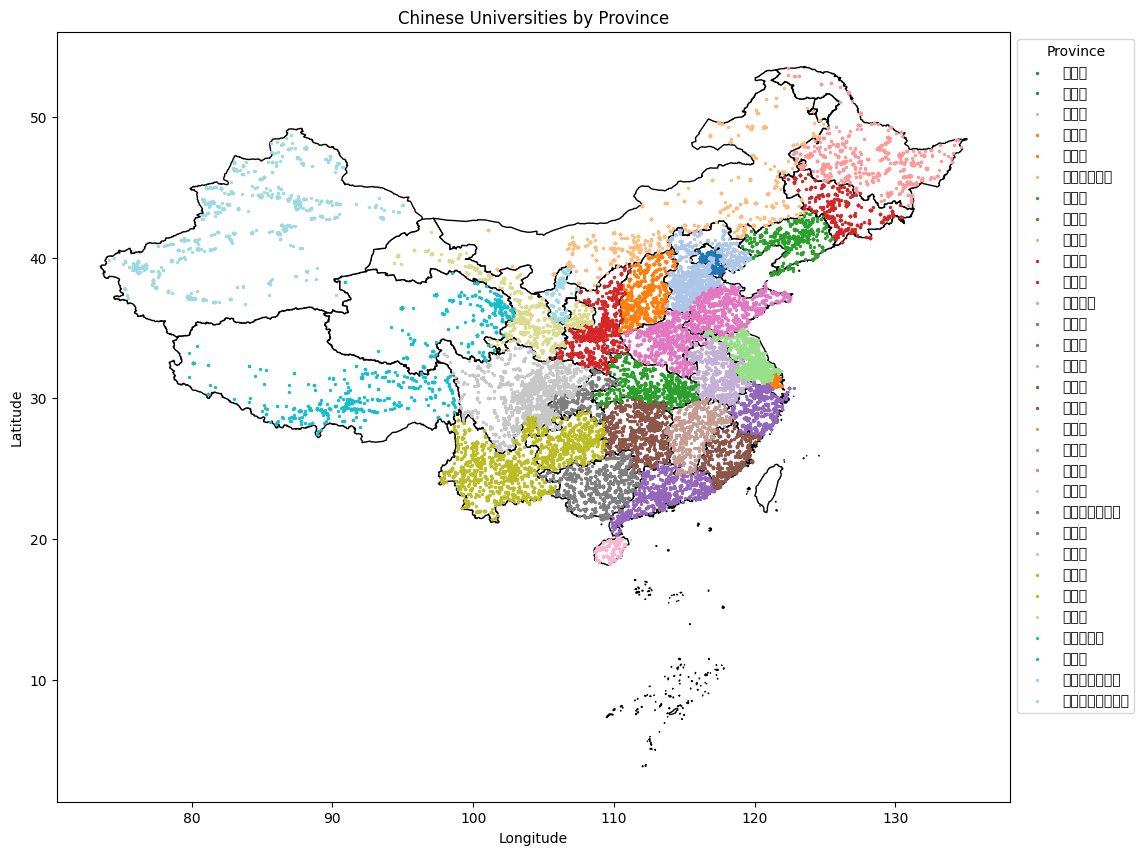

In [4]:
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

plt.rcParams["font.sans-serif"] = ["SimHei"]

# 创建一个GeoDataFrame
gdf = gpd.GeoDataFrame(
    chinese_places_df, geometry=gpd.points_from_xy(chinese_places_df.lng, chinese_places_df.lat))

# 读取GeoJSON文件，用于绘制中国地图
geojson_path = 'china.geoJson'  # 您需要提供一个中国地图的GeoJSON文件路径
china_gdf = gpd.read_file(geojson_path)

# 获取所有省份的唯一列表
provinces = chinese_places_df['province'].unique()

# 为每个省份生成一个颜色
colors = plt.get_cmap('tab20', len(provinces))

# 创建一个颜色映射
province_to_color = {province: colors(i) for i, province in enumerate(provinces)}

# 绘制中国地图
fig, ax = plt.subplots(figsize=(15, 10))
china_gdf.plot(ax=ax, color='white', edgecolor='black')

# 绘制每个省份的大学
for province in provinces:
    subset = gdf[gdf['province'] == province]
    subset.plot(ax=ax, marker='o', color=province_to_color[province], markersize=2, label=province)

# 添加图例
plt.legend(title="Province", loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Chinese Universities by Province")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [5]:
#!pip uninstall flash-attn -y

In [6]:
import torch
from modelscope import Model, AutoTokenizer

# 加载Llama-2-7B模型和分词器
model = Model.from_pretrained("modelscope/Llama-2-7b-ms", revision='v1.0.1', device_map='auto', torch_dtype=torch.float16)
tokenizer = AutoTokenizer.from_pretrained("modelscope/Llama-2-7b-ms", revision='v1.0.1')

2024-08-09 09:55:23.170231: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-09 09:55:23.213330: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-09 09:55:23.945564: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-08-09 09:55:24,590 - modelscope - INFO - Use user-specified model revision: v1.0.1
Downloading: 100%|██████████| 21.0/21.0 [00:00<00:00, 33.7B/s]
Downloading: 100%|██████████| 179/179 [00:00<00:00, 295B/s]
Downloading: 100%|██████████| 6.86k/6.8

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:540: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:545: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/transformers/generation/configuratio

In [7]:
# 定义提取激活值的函数
def get_activations(place_name):
    inputs = tokenizer(place_name, return_tensors="pt")
    input_ids = inputs.input_ids.to(model.device)

    last_hidden_states = []

    def hook(module, input, output):
        last_hidden_states.append(output[0])

    hook_handle = model.model.layers[-1].register_forward_hook(hook)

    with torch.no_grad():
        model(input_ids)

    hook_handle.remove()

    # 提取并返回激活值，确保一致的形状
    activations = last_hidden_states[0].squeeze(0).cpu().numpy()
    
    # 获取最后一个标记的激活值
    last_token_activations = activations[-1]

    return last_token_activations


In [8]:
import numpy as np
from tqdm import tqdm  # 导入 tqdm 库用于显示进度条

# 生成每个地点的激活值并显示进度
train_activations = np.array([get_activations(input_text) for input_text in tqdm(inputs_train, desc="Calculating Train Activations")])
# 生成每个地点的激活值并显示进度
test_activations = np.array([get_activations(input_text) for input_text in tqdm(inputs_test, desc="Calculating Test Activations")])


# 确认激活值的形状
print("Activation shape for one input:", train_activations[0].shape+test_activations[0].shape)

Calculating Test Activations: 100%|██████████| 5722/5722 [03:28<00:00, 27.44it/s]

Activation shape for one input: (4096, 4096)


In [9]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# 使用计算好的激活值
X_train = train_activations
y_train = coords_train
X_test = test_activations
y_test = coords_test

# 创建并训练线性岭回归模型
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# 预测并评估模型
y_pred = ridge_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")


R² Score: 0.4273139079938466
Mean Squared Error: 36.81937663568267


Skipping field center: unsupported OGR type: 3
Skipping field centroid: unsupported OGR type: 3
Skipping field acroutes: unsupported OGR type: 1
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfon

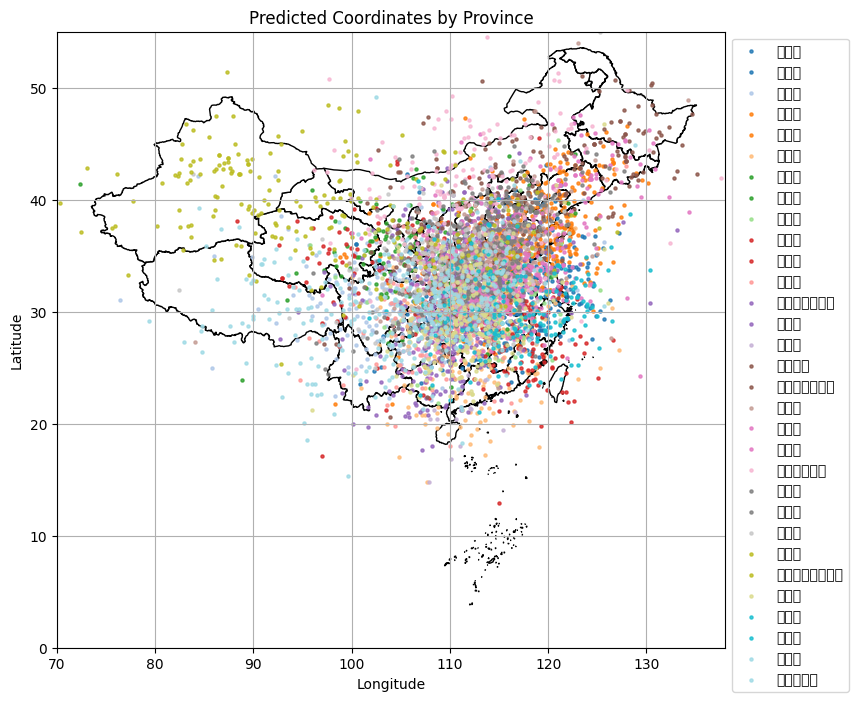

In [10]:
import matplotlib.pyplot as plt
import geopandas as gpd

# 确认测试集预测和大洲信息长度相同
assert len(y_pred) == len(coords_test), "预测结果和测试集坐标的长度不匹配"

# 从数据集中获取对应省份信息
def get_provinces_by_coords(df, coords):
    coord_to_province = {(row['lat'], row['lng']): row['province'] for _, row in df.iterrows()}
    provinces = [coord_to_province[(coord[0], coord[1])] for coord in coords]
    return provinces

provinces_test = get_provinces_by_coords(chinese_places_df, coords_test)

# 定义一个函数来根据省份绘制预测坐标
def plot_predictions_by_province(y_pred, provinces):
    # 创建一个新的绘图窗口
    fig, ax = plt.subplots(figsize=(12, 8))
    # 读取中国各省的GeoJSON文件
    geojson_path = 'china.geoJson'  # 请提供中国省份GeoJSON文件的路径
    gdf = gpd.read_file(geojson_path)

    # 绘制GeoDataFrame
    gdf.plot(ax=ax, color='white', edgecolor='black', linewidth=1)

    # 设置标题和标签
    ax.set_title('China Map with Predicted Coordinates by Province', fontsize=15)
    # 定义省份颜色映射
    provinces_unique = list(set(provinces))
    colors = plt.get_cmap('tab20', len(provinces_unique))
    province_colors = {province: colors(i) for i, province in enumerate(provinces_unique)}

    # 绘制预测坐标
    for province, color in province_colors.items():
        mask = (np.array(provinces) == province)
        plt.scatter(y_pred[mask, 1], y_pred[mask, 0], label=province, color=color, alpha=0.8, s=5)
    
    # 设置x轴和y轴范围
    plt.xlim(70, 138)
    plt.ylim(0, 55)
    
    plt.title("Predicted Coordinates by Province")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

# 绘制测试集预测的坐标
plot_predictions_by_province(y_pred, provinces_test)
